# Práctica 6 - Graficando con matplotlib.pyplot
Autor: Claudio Morales D.<br>
https://github.com/cmoralesd/conociendo-python <br>
Otoño 2023<br>
<br>
Para profundizar en las opciones de graficación con matplotlib, consulte la documentación oficial, disponible en https://matplotlib.org/

Un tutorial introductorio sobre el uso de pyplot, se encuentra en https://matplotlib.org/stable/tutorials/introductory/pyplot.html

Los archivos de datos en formato **csv** utilizados en esta actividad se obtuvieron desde: https://climatologia.meteochile.gob.cl/application/index/menuTematicoEmas



## 1. Introducción a pyplot

**Matplotlib** es una librería para crear gráficos estáticos, dinámicos, animados, visualizaciones interactivas y otros elementos gráficos en Python. Dentro de **matplotlib** existe una interfaz denominada **pyplot**, diseñada para trabajar en gráficos al estilo de MATLAB, que resulta más familiar en las disciplinas de las ciencias y la ingeniería.

La forma típica de importar la librería ```matplotlib.pyplot``` es utilizando el nombre corto ```plt```

In [1]:
# importamos la librería de gráficos
import matplotlib.pyplot as plt


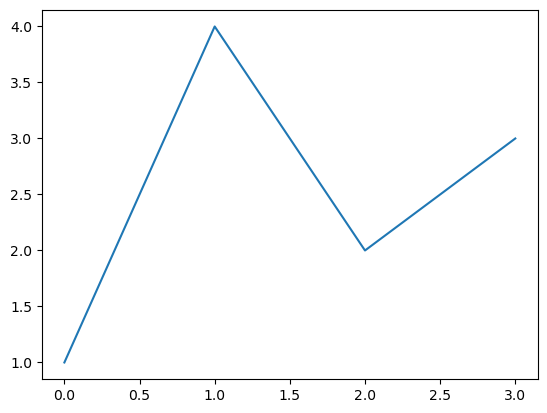

In [2]:
# matplotlib grafica los datos en una 'Figure' (por ejemplo, una ventana de Windows), la cual contiene
# uno o más 'Axes' (un área donde los puntos se ordenan en coordenadas x-y, theta-radio, o x-y-z en caso 3D).
# La forma más simple de crear una Figure con un Axes es utilizando pyplot.subplots()
# Para graficar sobre un axes, la sintaxis básica es plot(<coordenadas x>, <coordenadas y>, <opciones>)

fig, ax = plt.subplots() 
ax.plot([1, 4, 2, 3])
plt.show()

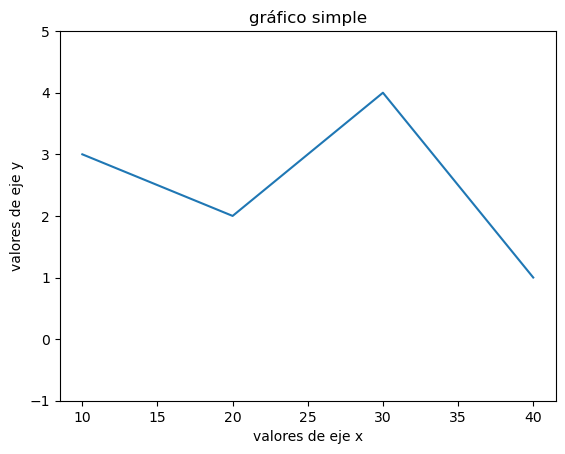

In [3]:
# Los límites de los ejes, textos en los ejes o el título de la gráfica 
# se añaden en instrucciones separadas, antes de .show()

fig, ax = plt.subplots() 
ax.plot([10, 20, 30, 40], [3, 2, 4, 1])
ax.set_xlabel('valores de eje x')
ax.set_ylabel('valores de eje y')
ax.set_ylim(-1, 5)
ax.set_title('gráfico simple')
plt.show()

## 2. Explorando opciones de gráficos

Para ensayar varios tipos de gráficos, utilizaremos un registro de temperaturas de una estación meteorologica, acondicionando los datos con la libreria **meteodatos**, que hemos construido previamente.

In [4]:
# utilicemos pyplot para hacer algunos gráficos con registros de temperatura
import meteodatos as mtd
datos = mtd.leer_archivo('330075_202303_Temperatura.csv')
datos

El archivo fue leido correctamente: 330075_202303_Temperatura.csv


['codigoNacional;idEquipo;idPista;momento;ts;td;tMin12Horas;tMax12Horas;tMin24Horas;tMax24Horas;horaTMin12Horas;horaTMax12Horas;horaTMin24Horas;horaTMax24Horas;ts02;ts10;ts30;momentoRegistro;tsMed15m;tsMax15m;tsMin15m;tsSupMax15m;tsSupMed15m;tsSupMin15m;tMin1M;tMax1M',
 '330075;0;;2023-03-01 00:00:00;23.9;7.4;;;;;;;;;;;;2023-03-01 00:20:14;;24.6;23.9;;;;;',
 '330075;0;;2023-03-01 00:20:00;22.5;6.1;;;;;;;;;;;;2023-03-01 01:45:01;;24.1;22.2;;;;;',
 '330075;0;;2023-03-01 00:40:00;21.1;5.8;;;;;;;;;;;;2023-03-01 01:45:01;;22.6;20.9;;;;;',
 '330075;0;;2023-03-01 01:00:00;20.5;5.3;;;;;;;;;;;;2023-03-01 01:45:01;;21.6;20.5;;;;;',
 '330075;0;;2023-03-01 01:20:00;19.9;5.2;;;;;;;;;;;;2023-03-01 02:35:14;;20.7;19.8;;;;;',
 '330075;0;;2023-03-01 01:40:00;19.3;5.1;;;;;;;;;;;;2023-03-01 02:35:14;;20.0;19.2;;;;;',
 '330075;0;;2023-03-01 02:00:00;19.4;5.1;;;;;;;;;;;;2023-03-01 02:35:14;;20.0;19.2;;;;;',
 '330075;0;;2023-03-01 02:20:00;18.6;4.9;;;;;;;;;;;;2023-03-01 03:20:15;;19.7;18.6;;;;;',
 '330075;0

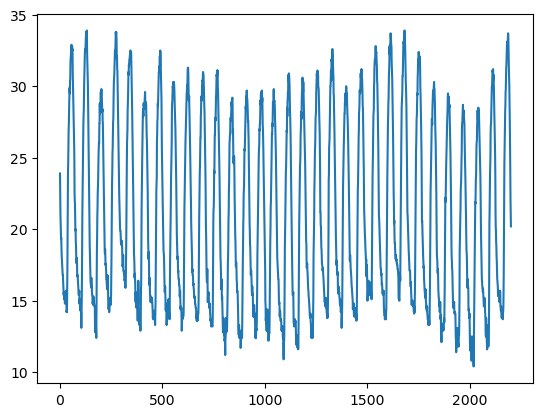

In [5]:
ts = mtd.filtrar_cabecera(datos, 'ts')[1:]
fig, ax = plt.subplots()
ax.plot(ts)
plt.show()


In [6]:
ts_01 = mtd.filtrar_cabecera(mtd.filtrar_dia(datos, '2023-03-01'), 'ts')[1:]


In [7]:
# Almacenaremos los datos de temperatura para el mes de marzo en una forma más conveniente

ts_mes = {} # almacena los datos de temperatura, organizados por día
            # ejemplo: {'2023-03-01':[10.5, 11,2, 11,7,....]}
dias = []  # guarda la lista de dias registrados en el archivo, como elementos 'str' con formato 'AAAA-MM-DD'

# primero identificamos todos los dias registrados en los datos
for fila in datos[1:]:
    fecha = fila.split(';')[3].split(' ')[0]
    #print(fecha)
    if fecha not in dias:
        dias.append(fecha)

#dias
for dia in dias[:-1]:
    datos_dia = mtd.filtrar_dia(datos, dia)
    ts_dia = mtd.filtrar_cabecera(datos_dia, 'ts')[1:]
    ts_mes.update({dia: ts_dia})

ts_mes

{'2023-03-01': [23.9,
  22.5,
  21.1,
  20.5,
  19.9,
  19.3,
  19.4,
  18.6,
  18.2,
  17.9,
  17.6,
  17.4,
  17.1,
  16.8,
  16.8,
  16.4,
  16.1,
  15.7,
  15.4,
  15.6,
  15.1,
  15.4,
  15.3,
  15.1,
  14.8,
  15.1,
  14.9,
  15.1,
  15.1,
  15.7,
  15.6,
  15.0,
  14.2,
  14.3,
  14.2,
  15.5,
  17.4,
  19.6,
  22.1,
  24.0,
  24.7,
  25.9,
  26.9,
  27.3,
  28.2,
  28.9,
  29.3,
  29.9,
  29.5,
  30.4,
  30.5,
  31.7,
  31.9,
  32.2,
  32.4,
  32.3,
  32.9,
  32.6,
  32.5,
  32.8,
  32.5,
  32.6,
  31.0,
  30.3,
  29.4,
  28.9,
  28.1,
  27.5,
  26.9,
  25.9,
  24.8,
  22.5],
 '2023-03-02': [22.0,
  21.8,
  20.7,
  19.9,
  20.0,
  19.1,
  18.9,
  18.1,
  18.0,
  17.6,
  18.0,
  17.6,
  16.7,
  16.8,
  16.8,
  16.4,
  16.2,
  16.0,
  15.6,
  15.4,
  15.4,
  15.5,
  15.7,
  14.8,
  15.1,
  14.8,
  14.5,
  14.4,
  14.3,
  14.6,
  14.4,
  14.1,
  13.1,
  13.9,
  15.0,
  16.6,
  19.1,
  21.1,
  22.4,
  24.0,
  24.7,
  26.3,
  27.4,
  27.8,
  28.4,
  29.6,
  30.3,
  31.1,
  31.5,
  3

## ACTIVIDAD:

Completar los siguientes 3 gráficos, incluyendo las características que se indican:

1. Un gráfico de las temperaturas 'ts' del día 1 de marzo. El eje x indicará las horas del día en formato 'float' 0.00 a 24.00 hrs., redondeado a 2 decimales. Por ejemplo, las 3:30 hrs (3 de la mañana y 30 minutos) se representarían como 3.50. Las 12:40 hrs (12 horas y 40 minutos) se representarán como 12.67. El eje y debe indicar la leyenda 'Temperatura en °C'.
2. Un gráfico de las temperaturas máximas para todo el mes de marzo, destacando los puntos de cada día con un círculo, y uniendo los puntos con línea segmentada. El eje x debe indicar el número de día, en formato 'int'. El eje y debe indicar la leyenda 'Temperatura en °C'.
3. Un gráfico que incluya la información del gráfico del punto 2, además de una segunda línea con las temperaturas mínimas de cada día. Deberá agregarse una leyenda que indique qué color de curva representa cada información (tmáxima y tmínima).

**NOTA**: Recuerde que el archivo de datos **330075_202303_Temperatura.csv** y la librería **meteodatos.py** deben estar alojadas en la misma carpeta que este cuaderno de Jupyter.



In [10]:
import csv
import matplotlib.pyplot as plt
from meteodatos import filtrar_dia, estadisticas_dia

# Leer el archivo CSV
nombre_archivo = '330075_202303_Temperatura.csv'
with open(nombre_archivo, 'r') as archivo:
    datos_csv = list(csv.reader(archivo, delimiter=';'))

# Gráfico de temperaturas 'ts' del día 1 de marzo
dia = '01'  # Día a graficar
datos_filtrados = filtrar_dia(datos_csv, dia)
horas = [float(fila[0]) for fila in datos_filtrados[1:]]
temperaturas = [float(fila[1]) for fila in datos_filtrados[1:]]

plt.plot(horas, temperaturas)
plt.xlabel('Hora del día')
plt.ylabel('Temperatura en °C')
plt.title(f'Temperaturas del día {dia} de marzo')
plt.show()


AttributeError: 'list' object has no attribute 'split'

In [11]:
# Gráfico de temperaturas máximas para todo el mes de marzo
temperaturas_maximas = []
for dia in range(1, 32):
    dia_str = f"{dia:02}"  # Convertir a formato '01', '02', ..., '31'
    datos_filtrados = filtrar_dia(datos_csv, dia_str)
    temperatura_max, _, _ = estadisticas_dia(datos_filtrados, dia_str)
    temperaturas_maximas.append(temperatura_max)

dias = range(1, 32)
plt.plot(dias, temperaturas_maximas, 'o-', markersize=5, label='Temperatura máxima')
plt.xlabel('Día')
plt.ylabel('Temperatura en °C')
plt.title('Temperaturas máximas del mes de marzo')
plt.legend()
plt.show()

AttributeError: 'list' object has no attribute 'split'

In [ ]:
# Gráfico de temperaturas máximas y mínimas para todo el mes de marzo
temperaturas_minimas = []
for dia in range(1, 32):
    dia_str = f"{dia:02}"  # Convertir a formato '01', '02', ..., '31'
    datos_filtrados = filtrar_dia(datos_csv, dia_str)
    temperatura_max, temperatura_min, _ = estadisticas_dia(datos_filtrados, dia_str)
    temperaturas_maximas.append(temperatura_max)
    temperaturas_minimas.append(temperatura_min)

plt.plot(dias, temperaturas_maximas, 'o-', markersize=5, label='Temperatura máxima')
plt.plot(dias, temperaturas_minimas, 'o-', markersize=5, label='Temperatura mínima')
plt.xlabel('Día')
plt.ylabel('Temperatura en °C')
plt.title('Temperaturas máximas y mínimas del mes de marzo')
plt.legend()
plt.show()
